In [2]:
#Import necessary libraries
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import geopandas as gpd


In [3]:
import sys
print(sys.executable)

c:\Users\13124\AppData\Local\Programs\Python\Python313\python.exe


In [4]:
#Load Airbnb Listings 
nyc_airbnb_listings = pd.read_csv('listings.csv')

In [5]:
#Load Airbnb Reviews 
nyc_airbnb_reviews = pd.read_csv('reviews.csv')

In [6]:
#Load Airbnb Reviews
nyc_rent_prices = pd.read_csv('Zip_zori_uc_sfrcondomfr_sm_month.csv')

DATA CLEANING

In [7]:

#Separating the date columns from the non-date columns in the rent prices DataFrame.
cols = nyc_rent_prices.columns
usable_cols = cols[0:9]
dates_cols = cols[9:]
print(dates_cols) 

Index(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
       ...
       '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
       '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
      dtype='object', length=131)


In [8]:
#Melting the rent prices DataFrame to transform it from wide format to long format.
nyc_rent_prices = pd.melt(nyc_rent_prices, id_vars=usable_cols, value_vars=dates_cols, var_name='date', value_name='rent_price')                    

In [9]:
#Checking the data types of each column in the rent prices DataFrame. Date column is an object format and needs to be converted to a datetime format.
nyc_rent_prices.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
State          object
City           object
Metro          object
CountyName     object
date           object
rent_price    float64
dtype: object

In [10]:
#Reformat as datetime

nyc_rent_prices['date'] = pd.to_datetime(nyc_rent_prices['date'], format = '%Y-%m-%d')

#Keep only year and month in date column

nyc_rent_prices['date'] = nyc_rent_prices['date'].dt.to_period('M')

In [ ]:
#Chaning the date column in the reviews DataFrame to a datetime format.

nyc_airbnb_reviews['date'] = pd.to_datetime(nyc_airbnb_reviews['date'], format = '%Y-%m-%d')

#Keep only year and month in date column

nyc_airbnb_reviews['date'] = nyc_airbnb_reviews['date'].dt.to_period('M')


In [ ]:
#Filter reviews to only include 2022 to September 2025
nyc_airbnb_reviews['date'] = pd.to_datetime(nyc_airbnb_reviews['date'])


#Group by month and count
monthly_counts = nyc_airbnb_reviews.groupby(nyc_airbnb_reviews['date'].dt.to_period('M')).size()
print(monthly_counts)


date
2009-05        1
2009-06        2
2009-07        3
2009-08        4
2009-10        7
           ...  
2025-08    13618
2025-09    14133
2025-10    14050
2025-11    11446
2025-12      557
Freq: M, Length: 199, dtype: int64


<Figure size 1200x600 with 0 Axes>

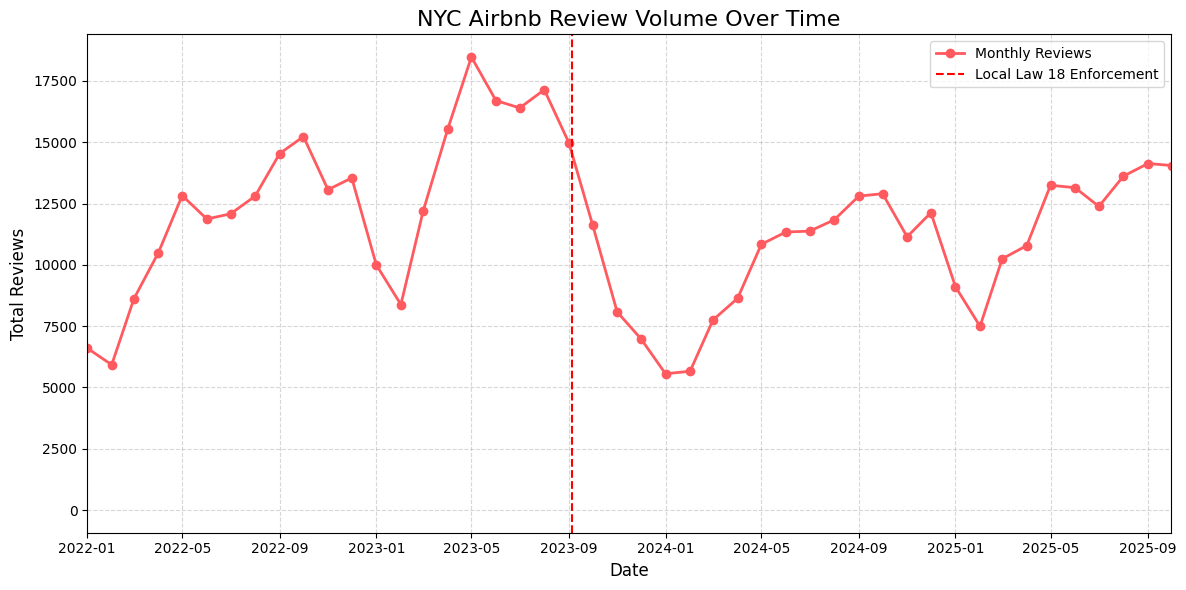

In [13]:
plt.figure(figsize=(12, 6))

x_values = monthly_counts.index
y_values = monthly_counts.values

if isinstance(monthly_counts.index, pd.PeriodIndex):
    x_values = x_values.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(x_values, 
         y_values, 
         marker='o', 
         color='#FF5A5F',  # Airbnb Red
         linewidth=2,
         label='Monthly Reviews')

# Set x-axis limits to 2022-01-01 to 2025-09-30
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2025-09-30'))

plt.axvline(pd.Timestamp('2023-09-05'), color='red', linestyle='--', label='Local Law 18 Enforcement')

# 5. Labels and Titles
plt.title("NYC Airbnb Review Volume Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Reviews", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# 6. Show it
plt.tight_layout()
plt.show()

In [ ]:
print(monthly_counts.dtypes)



int64


In [15]:
df_style = monthly_counts.to_frame(name='Review Count')

if isinstance(df_style.index, pd.PeriodIndex):
    septembers = df_style[df_style.index.month == 9].copy()
else:
    septembers = df_style[df_style.index.month == 9].copy()

septembers['Change'] = septembers['Review Count'].diff() # The raw number drop
septembers['% Change'] = septembers['Review Count'].pct_change() # The percentage drop

styled_table = (septembers.style
    .format({
        'Review Count': '{:,.0f}',    # Comma for thousands (e.g. 15,000)
        'Change': '{:+,.0f}',         # Force +/- sign (e.g. -500)
        '% Change': '{:+.1%}'         # Percentage format (e.g. -15.5%)
    })
    .text_gradient(cmap='RdYlGn', subset=['% Change'], vmin=-0.5, vmax=0.5) # Color scale
    .set_caption("Year-Over-Year Review Changes (September Only)")
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]}
    ])
)

# 5. Display
styled_table

,Review Count,Change,% Change
date,,,
2010-09,73,+nan,+nan%
2011-09,250,+177,+242.5%
2012-09,392,+142,+56.8%
2013-09,759,+367,+93.6%
2014-09,"1,454",+695,+91.6%
2015-09,"3,131","+1,677",+115.3%
2016-09,"4,953","+1,822",+58.2%
2017-09,"6,623","+1,670",+33.7%
2018-09,"8,641","+2,018",+30.5%


Index([':id', ':version', ':created_at', ':updated_at', 'modzcta', 'label',
       'zcta', 'pop_est', 'geometry'],
      dtype='object')
                  :id           :version                      :created_at  \
0  row-gpt4_p42m_6vva  rv-ifsq~eg4w~ai57 2020-05-13 23:28:10.857000+00:00   
1  row-bbrn_fnac~4g99  rv-hpz3~wiyn~m6gy 2020-05-13 23:28:10.857000+00:00   
2  row-biyt~mhqy-petn  rv-gkuq_5peu.nhnh 2020-05-13 23:28:10.857000+00:00   
3  row-ybyu_gysg-cn9b  rv-mn4n.y64c-dt8w 2020-05-13 23:28:10.857000+00:00   
4  row-5tvi_hb3c-6qz6  rv-m2qf-b3bm.h8vn 2020-05-13 23:28:10.857000+00:00   

                       :updated_at modzcta         label                 zcta  \
0 2020-05-13 23:28:10.857000+00:00   10001  10001, 10118  10001, 10119, 10199   
1 2020-05-13 23:28:10.857000+00:00   10002         10002                10002   
2 2020-05-13 23:28:10.857000+00:00   10003         10003                10003   
3 2020-05-13 23:28:10.857000+00:00   10026         10026                1002

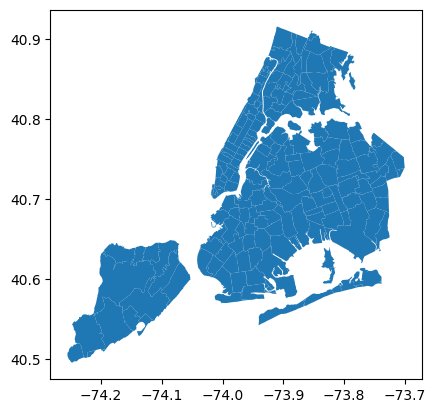

In [20]:
nyc_map = gpd.read_file("nyc_zip_geo.geojson")

nyc_map.plot()
print(nyc_map.columns)
print(nyc_map.head())

In [ ]:
#Create GeoDataFrame for Airbnb listings
airbnb_gdf = gpd.GeoDataFrame(
    nyc_airbnb_listings, 
    geometry=gpd.points_from_xy(nyc_airbnb_listings.longitude, nyc_airbnb_listings.latitude),
    crs="EPSG:4326"  
)

In [ ]:
#Convert Airbnb GeoDataFrame to match NYC map CRS
airbnb_gdf = airbnb_gdf.to_crs(nyc_map.crs)

In [54]:
joined_data = gpd.sjoin(airbnb_gdf, nyc_map, how="left", predicate="within")

joined_data['label'] = joined_data['label'].astype(str).str.split(',').str[0]

joined_data['label'] = joined_data['label'].str.strip()
print(joined_data['label'].unique())

['11218' '10018' '11211' '10035' '10029' '11201' '10003' '10027' '10030'
 '10009' '10025' '10026' '11222' '10475' '11221' '10019' '11238' '11226'
 '11216' '11206' '11231' '11103' '11101' '10012' '10011' '11205' '10024'
 '10013' '10023' '11102' '10002' '10075' '10010' '10031' '10001' '10040'
 '11215' '10128' '11693' '10014' '11234' '11233' '11217' '11104' '10039'
 '11385' '10454' '11207' '10028' '11105' '11379' '11223' '11434' '10036'
 '11225' '10032' '' '10021' '11235' '10314' '11209' '11204' '11203'
 '10065' '10305' '11374' '11213' '10017' '11237' '11377' '10034' '10468'
 '10033' '11220' '11378' '11229' '10463' '11373' '11435' '10016' '11208'
 '11372' '10280' '10307' '10304' '11232' '11370' '10007' '11356' '11106'
 '10469' '11361' '11230' '11355' '10451' '10464' '11692' '11418' '10455'
 '10037' '11428' '10022' '10069' '11236' '10467' '10473' '10460' '11210'
 '10038' '10006' '10462' '10005' '11224' '11214' '10471' '11360' '11417'
 '11109' '11357' '11354' '10282' '11421' '10004' '10312'

In [26]:
print(joined_data[['id', 'label']].head())

     id         label
0  2539         11218
1  2595         10018
2  6848  11211, 11249
3  6872         10035
4  6990         10029


In [34]:
zip_counts_dec_2025 = joined_data['label'].value_counts().reset_index()
nyc_density_map_dec_2025 = nyc_map.merge(zip_counts_dec_2025, on='label', how='left')

nyc_density_map_dec_2025['count'] = nyc_density_map_dec_2025['count'].fillna(0)

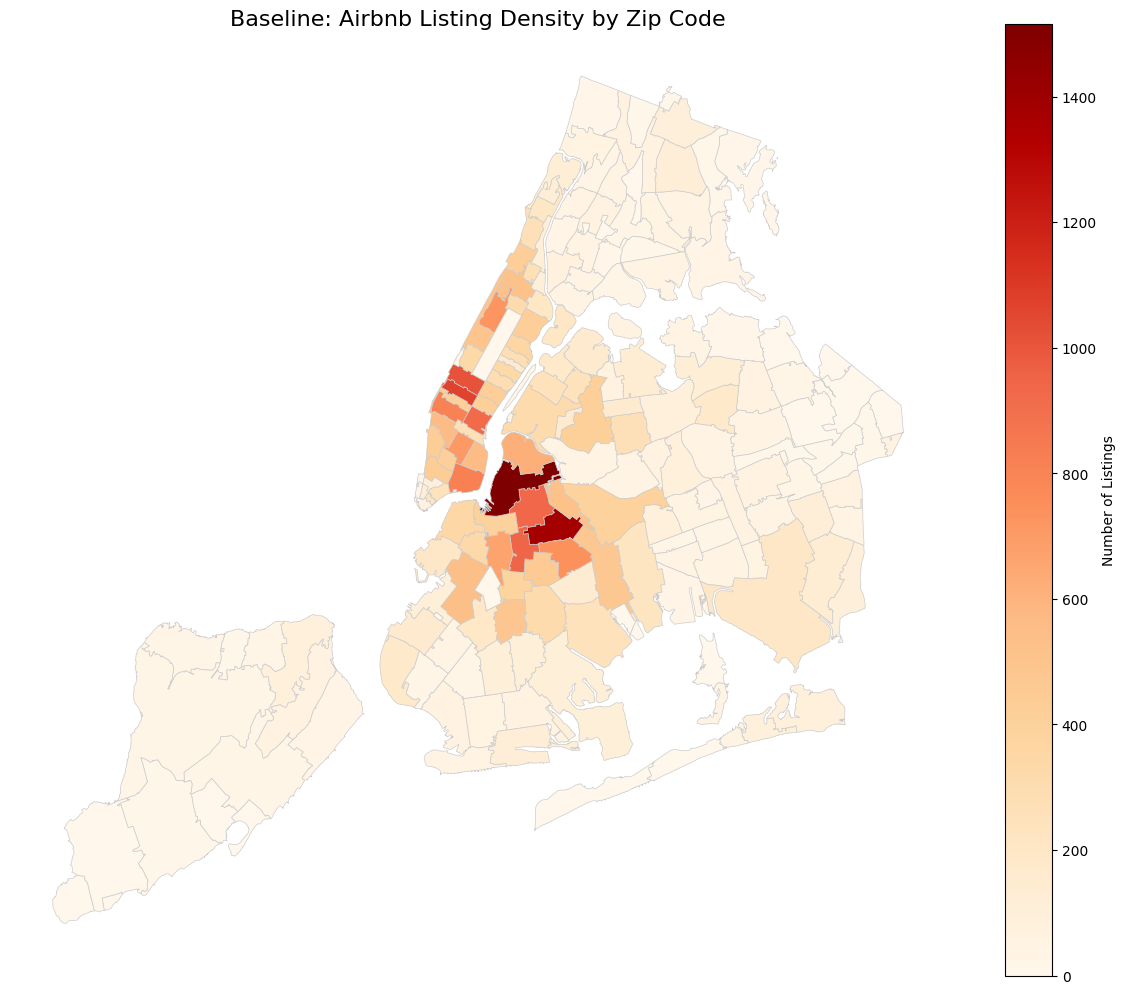

In [36]:
fig, ax = plt.subplots(figsize=(12, 10))
nyc_density_map_dec_2025.plot(
    column='count',
    cmap='OrRd',           # 'OrRd' = Orange to Red (Red is "Hot")
    linewidth=0.5,
    ax=ax,
    edgecolor='0.8',       # Light grey border for shapes
    legend=True,           # Show the color bar
    legend_kwds={'label': "Number of Listings"}
)

plt.title("Baseline: Airbnb Listing Density by Zip Code", fontsize=16)
plt.axis('off') # Turn off the ugly lat/lon box
plt.tight_layout()
plt.show()

In [56]:
zip_lookup = joined_data[['id', 'label']].drop_duplicates()

nyc_airbnb_reviews = nyc_airbnb_reviews.merge(
    zip_lookup, 
    left_on='listing_id', 
    right_on='id', 
    how='left'
)

In [55]:
#Define pre- and post-law periods

pre_start = pd.Period('2023-05', freq='M')
pre_end   = pd.Period('2023-08', freq='M')

post_start = pd.Period('2024-05', freq='M')
post_end   = pd.Period('2024-08', freq='M')

In [ ]:
#Filter reviews for pre- and post-law periods
pre_reviews = nyc_airbnb_reviews[
    (nyc_airbnb_reviews['date'] >= pre_start) & 
    (nyc_airbnb_reviews['date'] <= pre_end)
]

post_reviews = nyc_airbnb_reviews[
    (nyc_airbnb_reviews['date'] >= post_start) & 
    (nyc_airbnb_reviews['date'] <= post_end)
]

In [ ]:
#Count reviews per listing in pre- and post-law periods
pre_counts = pre_reviews['listing_id'].value_counts().reset_index()
pre_counts.columns = ['id', 'pre_count']

post_counts = post_reviews['listing_id'].value_counts().reset_index()
post_counts.columns = ['id', 'post_count']

In [ ]:
analysis_df = joined_data[['id', 'MODZCTA']].drop_duplicates().copy()

analysis_df = analysis_df.merge(pre_counts, on='id', how='left')
analysis_df = analysis_df.merge(post_counts, on='id', how='left')